

# Classification Learners


We start with Logistic Regression.

Logistic regression utilizes the sigmoid function $\triangleq \; \sigma(t) = \frac{1}{1 + e^{-t}$

This function bounds the range within [-1, 1], with $t = 0$ resulting in a value of 0.5.

## Mapping $t$

The argument of $t$ in the sigmoid function comes from the prediction value of the feature weights and observations, where $t = \theta^T x_i | x_i \text{  is the ith observation}$. This leads into the machine learning world's view of this function:

$$\hat{p} = h_{\theta}(\boldsymbol{x}) = \sigma(\boldsymbol{\theta^T}\boldsymbol{x})$$

Machine learning textbooks typically use $h_{\theta}(x)$ to denote a specific hypothesis function that could be used as our estimate, $\hat{f}(\boldsymbol{x})$

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Let's predict using just the petal width
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target]  == "virginica"
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)   # Equivalent to add evidence

LogisticRegression(random_state=42)

In [9]:
# Use the log_reg to predict classification probability for our single target
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # stuff this into a column vector
y_proba = log_reg.predict_proba(X_new)

# Apparently these were already sorted, so we can just take the index split
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

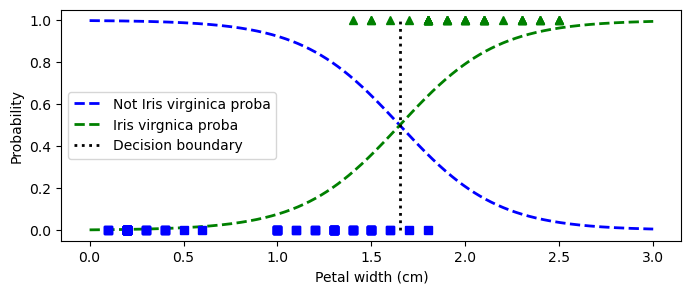

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g--", linewidth=2, label="Iris virgnica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.show()

In [21]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## Softmax Regression

- Generalization of the *logistic regression* that can support multi-class

***Multinomial logistic regression***, a.k.a. ***softmax regression***, deals with multi-classification problems that avoid the need to tape together multiple binary classifiers. This leads to models that have complex decision boundaries. I imagine these may serve as a basis for more interesting problems in n-dimensional space.

Surprise. More linear algebra applications, I don't know why I didn't just lean into matrix math in my first go at college. I think this feels like a very natural fit.

**Softmax score for class k**
$$s_k(\boldsymbol{x}) = (\boldsymbol{\theta}^{(k)})^T\boldsymbol{x}$$